In [240]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, optimize

1.0681806133201117 -0.06818061332011156 0.07908339228869513 0.9209166077113048
(100, 1000)


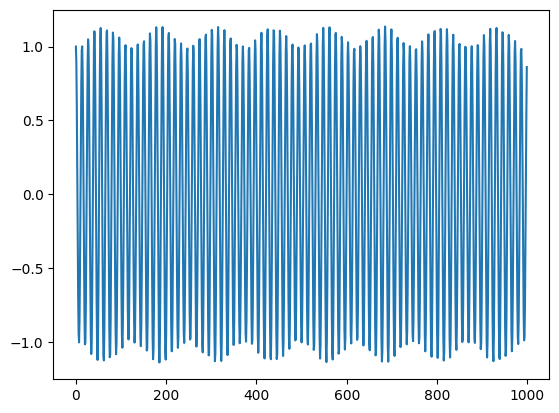

In [227]:
### Paper ###
# 2A. The simulation model with linear coupling

vx = 6.74149
vz = 6.69149
C = .05
x0 = 1
z0 = 1

vp2 = (vx**2 + vz**2 + np.sqrt( (vx**2 - vz**2)**2 + 4*C**2) )/2
vm2 = (vx**2 + vz**2 - np.sqrt( (vx**2 - vz**2)**2 + 4*C**2) )/2
vp = np.sqrt(vp2)
vm = np.sqrt(vm2)

A1 = ( C*z0 + (vx**2 - vm2)*x0 )/(vp2 - vm2)
A2 = -( C*z0 + (vx**2 - vp2)*x0 )/(vp2 - vm2)
B1 = ( C*x0 + (vz**2 - vm2)*z0 )/(vp2 - vm2)
B2 = -( C*x0 + (vz**2 - vp2)*z0 )/(vp2 - vm2)
print(A1, A2, B1, B2)

nBPMs = 50
phip = 2*np.pi*vp*np.linspace(0, nBPMs - 1, nBPMs)/nBPMs
phim = 2*np.pi*vm*np.linspace(0, nBPMs - 1, nBPMs)/nBPMs

nTurns = 1000
X1 = np.zeros([nTurns, nBPMs])
Z1 = np.zeros([nTurns, nBPMs])
for i in range(nTurns):
    X1[i] = A1*np.cos(vp*i + phip) + A2*np.cos(vm*i + phim)
    Z1[i] = B1*np.cos(vp*i + phip) + B2*np.cos(vm*i + phim)

X1 = X1.T
Z1 = Z1.T

TbT1 = np.vstack([X1, Z1])
# TbT1 = np.hstack([np.vstack([X1, np.zeros([nBPMs, nTurns])]), np.vstack([np.zeros([nBPMs, nTurns]), Z1])])
# TbT1 = np.hstack([X1, Z1])
print(TbT1.shape)
plt.plot(TbT1[0])
plt.show()

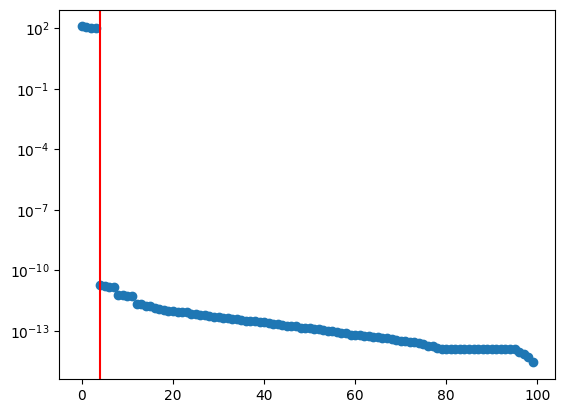

[1.21330139e+02 1.18165553e+02 1.04477759e+02 1.01978844e+02
 1.79577134e-11]


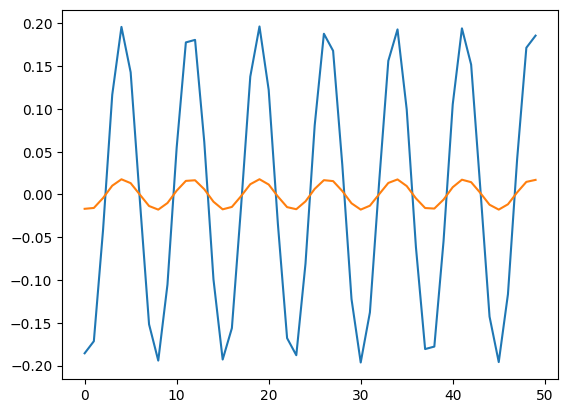

(1000, 1000)
(100, 1000)


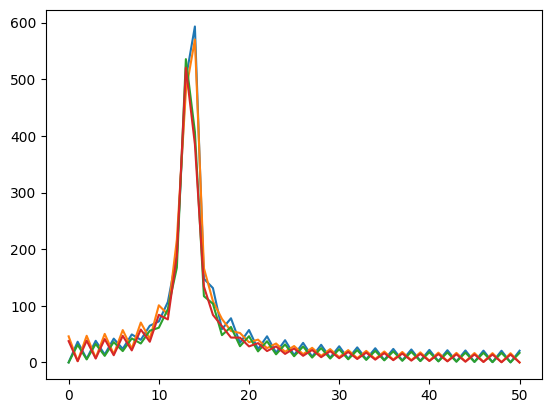

In [255]:
#PCA:
Ux, Sx, Vx = np.linalg.svd(TbT1)
keep_nx = 4
plt.plot(Sx, "o")
plt.yscale('log')
plt.axvline(x=keep_nx, color='r', linestyle='-')
plt.show()
print(Sx[:5])

# Sxmat = np.zeros((len(Ux), len(Vx)), dtype=complex)
# Sxmat[:keep_nx - 1, :keep_nx - 1] = np.diag(Sx[:keep_nx - 1])
# X1_PCA = Ux @ Sxmat @ Vx
# X1_PCA = np.real(X1_PCA)
# print(X1_PCA.shape)

plt.plot(Ux[:nBPMs, 0])
plt.plot(Ux[nBPMs:, 0])
# plt.plot(Ux[:nBPMs, 2])
# plt.plot(Ux[nBPMs:, 2])
plt.show()

# Omega = np.linspace(0, nTurns//2, nTurns//2)/nTurns
# plt.plot(Omega, np.abs(fft.rfft(Vx[0]))[1:])
# plt.show()

principal_components = Vx.T
print(principal_components.shape)
transformed_data = np.dot(TbT1, principal_components)
print(transformed_data.shape)

fft_results = np.array([np.abs(fft.rfft(row)) for row in transformed_data.T])

plt.plot(fft_results[0])
plt.plot(fft_results[1])
plt.plot(fft_results[2])
plt.plot(fft_results[3])
plt.show()


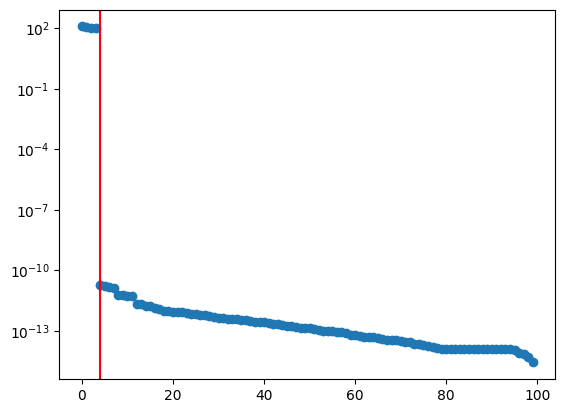

(100, 100)


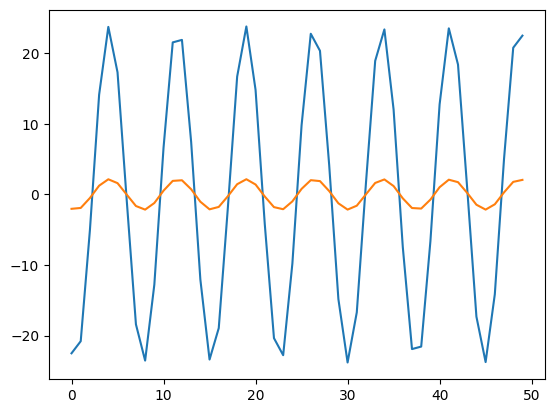

In [243]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Perform PCA
pca = PCA()
TbT1modes = pca.fit_transform(TbT1)
principal_components = pca.components_

# Singular Values
singular_values = pca.singular_values_
keep_nx = 4
plt.plot(singular_values, "o")
plt.yscale('log')
plt.axvline(x=keep_nx, color='r', linestyle='-')
plt.show()

print(TbT1modes.shape)
plt.plot(TbT1modes[:nBPMs, 0])
plt.plot(TbT1modes[nBPMs:, 0])
# plt.plot(TbT1modes[:nBPMs, 2])
# plt.plot(TbT1modes[nBPMs:, 2])
# plt.plot(TbT1modes[:nBPMs, 4])
# plt.plot(TbT1modes[nBPMs:, 4])
plt.show()


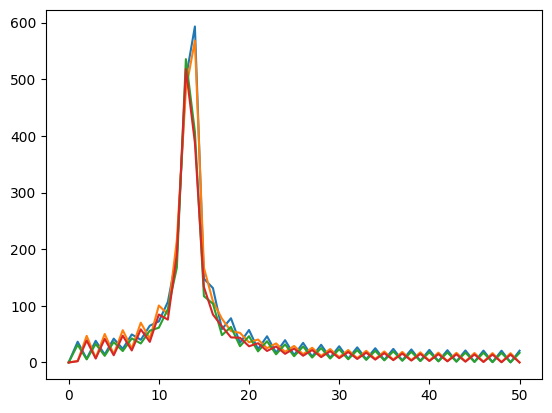

In [257]:
fft_results = np.array([np.abs(fft.rfft(row)) for row in TbT1modes.T])

plt.plot(fft_results[0])
plt.plot(fft_results[1])
plt.plot(fft_results[2])
plt.plot(fft_results[3])
plt.show()